In [1]:
import lightgbm as lgb
import sklearn
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from mlxtend.regressor import StackingCVRegressor
from datetime import datetime
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
df = pd.read_csv("data.csv")
display(df[:5])

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
## Check the unique number in each column
for i in df:
    print(i + " unique number is" , len(df[i].unique()))

Sex unique number is 3
Length unique number is 134
Diameter unique number is 111
Height unique number is 51
Whole weight unique number is 2429
Shucked weight unique number is 1515
Viscera weight unique number is 880
Shell weight unique number is 926
Rings unique number is 28


In [4]:
## I found the dataset has another description told the ring feature add 1.5 gives the age in years
df["Age"] = df['Rings'] + 1.5
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000,30.500000


In [5]:
## From the above table, I found Height column have some 0 value. Remove it.
df = df[df['Height']>0]
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
count,4175.000000,4175.00000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000
mean,0.524065,0.40794,0.139583,0.829005,0.359476,0.180653,0.238834,9.935090,11.435090
std,0.120069,0.09922,0.041725,0.490349,0.221954,0.109605,0.139212,3.224227,3.224227
min,0.075000,0.05500,0.010000,0.002000,0.001000,0.000500,0.001500,1.000000,2.500000
25%,0.450000,0.35000,0.115000,0.442250,0.186250,0.093500,0.130000,8.000000,9.500000
50%,0.545000,0.42500,0.140000,0.800000,0.336000,0.171000,0.234000,9.000000,10.500000
75%,0.615000,0.48000,0.165000,1.153500,0.502000,0.253000,0.328750,11.000000,12.500000
max,0.815000,0.65000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000,30.500000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000019710DA0>,
      dtype=object)

<Figure size 1440x1440 with 0 Axes>

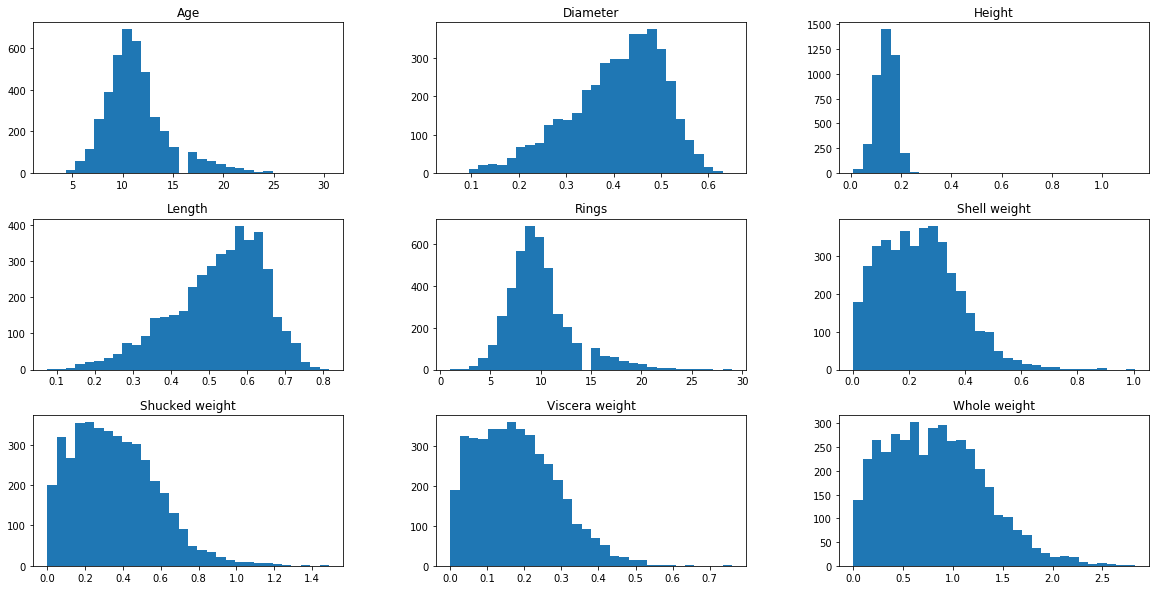

In [6]:
plt.figure(figsize=(20,20))
df.hist(figsize=(20,10), grid=False, bins = 30)

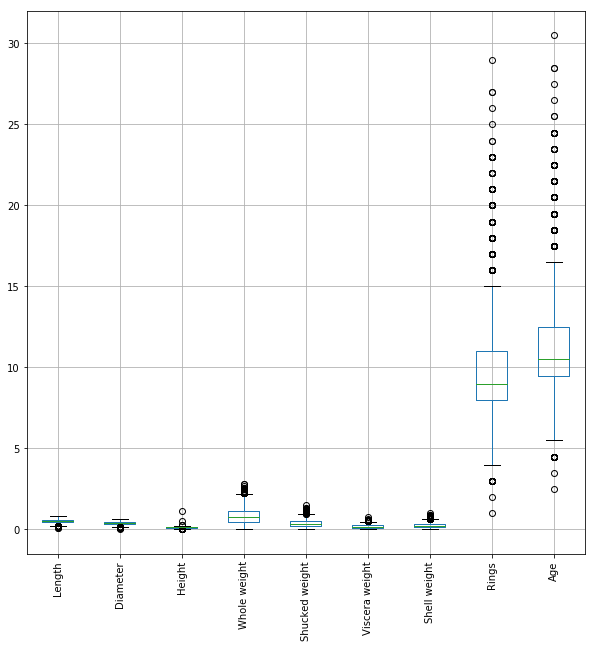

In [7]:
plt.figure(figsize=(10,10))
# for i in df.columns:
#     print(i)
#     plt.subplot(3, 3, count)
#     sns.boxplot(df[i])
#     count += 1
df.boxplot(rot = 90, figsize=(20,20))

In [8]:
df.skew().sort_values()

Length           -0.640993
Diameter         -0.610182
Whole weight      0.530549
Viscera weight    0.591455
Shell weight      0.621081
Shucked weight    0.718735
Rings             1.113754
Age               1.113754
Height            3.166364
dtype: float64

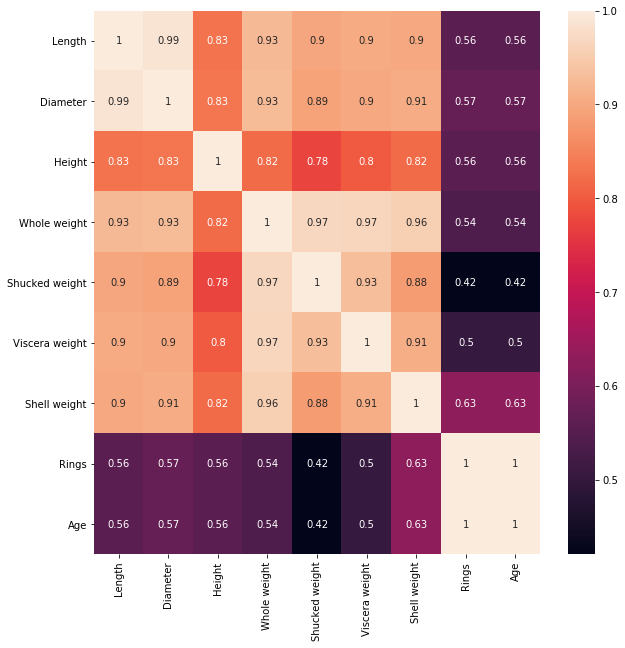

In [9]:
## Check the correlation of numerical data
df[["Length", "Diameter", "Height", "Whole weight", "Shucked weight","Viscera weight", "Shell weight", "Rings","Age"]].corr()

plt.figure(figsize=(10,10))
sns.heatmap(df[["Length", "Diameter", "Height", "Whole weight", "Shucked weight","Viscera weight", "Shell weight", "Rings","Age"]].corr(), annot = True)

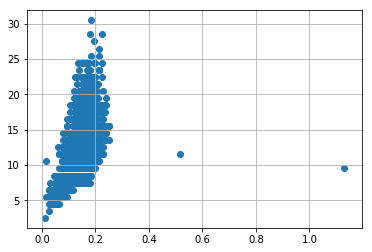

In [10]:
plt.scatter(x = df["Height"], y = df["Age"])
plt.grid(True)

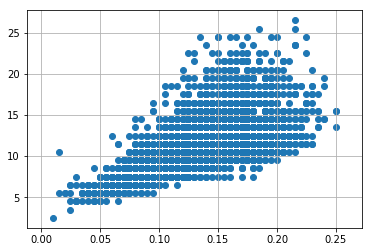

In [11]:
## Delete outlier in height-age
df = df[ (df[ "Height"]<0.4) & (df[ "Age"]<27) ]
plt.scatter(x = df["Height"], y = df["Age"])
plt.grid(True)


In [12]:
display(df[:10])

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8,9.5
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20,21.5
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16,17.5
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9,10.5
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19,20.5


## Start Training

In [13]:
## I will use lightgbm to set the base line, and use rmse
X = df.drop(["Age", "Rings"], axis = 1)
y = df.Age

In [14]:
## one-hot encoding
X = pd.get_dummies(X)
display(X[:10])

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0,1,0
5,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,0,1,0
6,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,1,0,0
7,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,1,0,0
8,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,0,0,1
9,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,1,0,0


In [15]:
## Normalize data
from sklearn.preprocessing import StandardScaler
Normal = StandardScaler()

# X = Normal.fit_transform(X)
# X = pd.DataFrame(X)

In [16]:
random_seed = 10 # set seed for same train test data split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=random_seed, test_size = 0.2)

In [17]:
X = X.astype('float')
display(X)

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,0.0,0.0,1.0
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,0.0,0.0,1.0
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,1.0,0.0,0.0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,0.0,0.0,1.0
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,0.0,1.0,0.0
5,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,0.0,1.0,0.0
6,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.3300,1.0,0.0,0.0
7,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.2600,1.0,0.0,0.0
8,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.1650,0.0,0.0,1.0
9,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.3200,1.0,0.0,0.0


In [18]:
## Evaluation methods
## I use Root Mean Squared Logarithmic Error (RMSLE) to evaluate the predict result
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def cv_rmse(model, X=X):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=kfolds))
    return (rmse)

In [19]:
from lightgbm import LGBMRegressor
lightgbm = LGBMRegressor(objective='regression', 
                                       num_leaves=8,
                                       learning_rate=0.01, 
                                       n_estimators=5000,
                                       max_bin=200, 
                                       bagging_fraction=0.75,
                                       bagging_freq=5, 
                                       bagging_seed=7,
                                       feature_fraction=0.2,
                                       feature_fraction_seed=7,
                                       verbose=-1,
                                       )

In [20]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.utils.validation import column_or_1d

kfolds = KFold(n_splits=10, shuffle=True, random_state=42)
score = cv_rmse(lightgbm)
print("lightgbm: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

y = column_or_1d(y, warn=False)
print('lightgbm')
lightgbm.fit(X_train, y_train)

lightgbm: 2.1512 (0.1023)
 2019-04-07 23:53:39.640509
lightgbm


LGBMRegressor(bagging_fraction=0.75, bagging_freq=5, bagging_seed=7,
       boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       feature_fraction=0.2, feature_fraction_seed=7, learning_rate=0.01,
       max_bin=200, max_depth=-1, min_child_samples=20,
       min_child_weight=0.001, min_split_gain=0.0, n_estimators=5000,
       n_jobs=-1, num_leaves=8, objective='regression', random_state=None,
       reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
       subsample_for_bin=200000, subsample_freq=1, verbose=-1)

In [21]:
y_pred = lightgbm.predict(X_test)
print('RMSLE score on train data:')
print(rmsle(y_test, y_pred))

## Stacking

In [24]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]

kfolds = KFold(n_splits=10, shuffle=True, random_state=42)

lasso = make_pipeline(RobustScaler(), LassoCV(max_iter=1e7, alphas=alphas2, random_state=42, cv=kfolds))  

svr = make_pipeline(RobustScaler(), SVR(C= 20, epsilon= 0.008, gamma=0.0003,))

gbr = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=4, max_features='sqrt', min_samples_leaf=15, min_samples_split=10, loss='huber', random_state =42)        

lightgbm = LGBMRegressor(objective='regression', 
                                       num_leaves=8,
                                       learning_rate=0.01, 
                                       n_estimators=5000,
                                       max_bin=200, 
                                       bagging_fraction=0.75,
                                       bagging_freq=5, 
                                       bagging_seed=7,
                                       feature_fraction=0.2,
                                       feature_fraction_seed=7,
                                       verbose=-1,
                                       )

xgboost = XGBRegressor(learning_rate=0.01,n_estimators=3460,
                                     max_depth=3, min_child_weight=0,
                                     gamma=0, subsample=0.7,
                                     colsample_bytree=0.7,
                                     objective='reg:linear', nthread=-1,
                                     scale_pos_weight=1, seed=27,
                                     reg_alpha=0.00006)

In [25]:
from sklearn.utils.validation import column_or_1d
y = np.array(y).ravel()
y = column_or_1d(y, warn=False)
display(y.shape)

(4169,)

In [28]:
stack_gen = StackingCVRegressor(regressors=(lasso, gbr, xgboost, lightgbm),
                                meta_regressor=lightgbm,
                                use_features_in_secondary=True)

In [29]:
score = cv_rmse(lasso , y)
print("LASSO: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(svr)
print("SVR: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(lightgbm)
print("lightgbm: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(gbr)
print("gbr: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(xgboost)
print("xgboost: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

ValueError: Expected 2D array, got 1D array instead:
array=[16.5  8.5 10.5 ... 10.5 11.5 13.5].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [27]:
print('START Fit')

print('stack_gen')
stack_gen_model = stack_gen.fit(np.array(X), np.array(y))

print('Lasso')
lasso_model_full_data = lasso.fit(X, y)

print('Svr')
svr_model_full_data = svr.fit(X, y)

print('GradientBoosting')
gbr_model_full_data = gbr.fit(X, y)

print('xgboost')
xgb_model_full_data = xgboost.fit(X, y)

y = column_or_1d(y, warn=False)
train_lgb = lgb.Dataset(X, y)
print('lightgbm')
lgb_model_full_data = lightgbm.fit(X, y)

START Fit
stack_gen


NameError: name 'stack_gen' is not defined

In [ ]:
def blend_models_predict(X):
    return ((0.15 * lasso_model_full_data.predict(X)) + \
            (0.05 * svr_model_full_data.predict(X)) + \
            (0.1 * gbr_model_full_data.predict(X)) + \
            (0.2 * xgb_model_full_data.predict(X)) + \
            (0.2 * lgb_model_full_data.predict(X)) + \
            (0.3 * stack_gen_model.predict(np.array(X))))

print('RMSLE score on train data:')
print(rmsle(y, blend_models_predict(X)))